In [2]:
pip install pandas_datareader

   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/109.5 kB 262.6 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/109.5 kB 245.8 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/109.5 kB 328.2 kB/s eta 0:00:01
   -------------------------------- ------ 92.2/109.5 kB 403.5 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/109.5 kB 347.8 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 353.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
pip install yfinance

  Using cached yfinance-0.2.41-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.6-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.41-py2.py3-none-any.whl (73 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
import pandas as pd

# Fetch data from Yahoo Finance using yfinance
df = yf.download("GOOGL", start="2009-01-01", end="2023-01-01")

# Display the last few rows of the DataFrame
print(df.tail())



[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-12-23  87.110001  89.550003  87.070000  89.230003  89.127708  23003000
2022-12-27  88.800003  88.940002  87.010002  87.389999  87.289818  20097300
2022-12-28  86.980003  88.040001  85.940002  86.019997  85.921387  19523200
2022-12-29  86.620003  88.849998  86.610001  88.449997  88.348602  23333500
2022-12-30  86.980003  88.300003  86.570000  88.230003  88.128860  23986300


In [6]:
df = df.reset_index()
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.722723,8.053554,7.645145,8.041041,144275580
1,8.033033,8.289289,7.882883,8.209459,195364440
2,8.332833,8.528529,8.167918,8.359860,256750992
3,8.216216,8.281031,7.976727,8.058308,179600220
4,7.964965,8.137888,7.941441,8.137888,143883972


In [7]:
df.shape

(3524, 5)

In [8]:
# Moving Average for 100
ma100 = df.Close.rolling(100).mean()

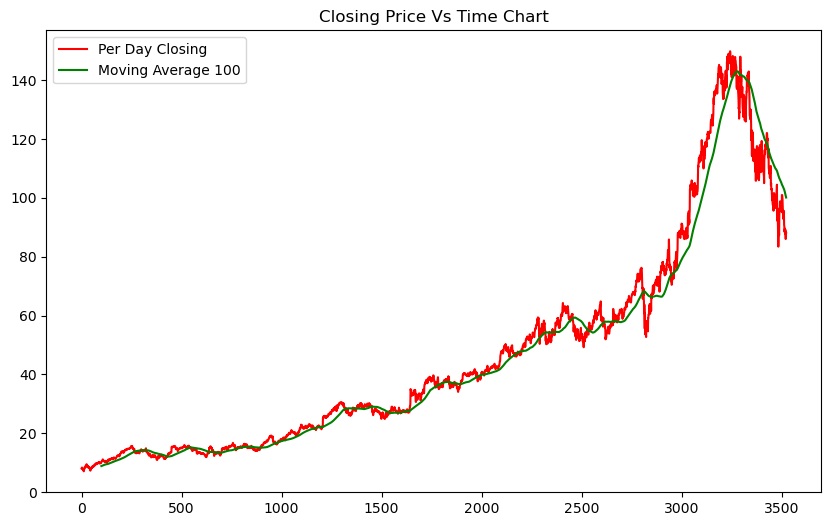

In [9]:
plt.figure(figsize = (10, 6))
plt.title("Closing Price Vs Time Chart")
plt.plot(df.Close, 'r', label="Per Day Closing")
plt.plot(ma100, 'g', label="Moving Average 100")
plt.legend()

In [10]:
# Moving Average for 200
ma200 = df.Close.rolling(200).mean()

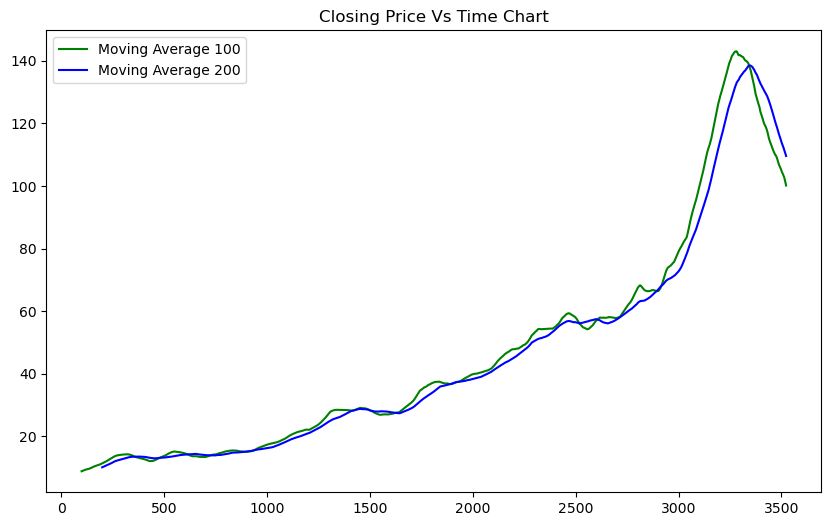

In [11]:
plt.figure(figsize = (10, 6))
plt.title("Closing Price Vs Time Chart")
plt.plot(ma100, 'g', label="Moving Average 100")
plt.plot(ma200, 'b', label="Moving Average 200")
plt.legend()

In [12]:
train_df = pd.DataFrame(df['Close'][0: int(len(df)*0.80)])
test_df = pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])
print(train_df.shape)
print(test_df.shape)

(2819, 1)
(705, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [14]:
train_df_arr = scaler.fit_transform(train_df)
train_df_arr

array([[0.01395472],
       [0.01638964],
       [0.01856408],
       ...,
       [0.7012188 ],
       [0.77547317],
       [0.67335177]])

In [15]:
x_train = []
y_train = []
for i in range(100, train_df_arr.shape[0]):
    x_train.append(train_df_arr[i-100: i])    
    y_train.append(train_df_arr[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((2719, 100, 1), (2719,))

In [17]:
pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     --------------- ---------------------- 20.5/48.7 kB 330.3 kB/s eta 0:00:01
     --------------- ---------------------- 20.5/48.7 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 246.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 991.0 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.1 MB 991.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.1 MB 409.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.1/1.1 MB 778.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.1 MB 807.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.1 MB 695.5 kB/s eta 0:00:02
   ---------- ----------------------------- 0.3/1.1 MB 886.2 kB/s eta 0:00:01


In [19]:
pip install tensorflow

   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB 660.6 kB/s eta 0:09:43
   ---------------------------------------- 0.0/385.2 MB 660.6 kB/s eta 0:09:43
   ---------------------------------------- 0.1/385.2 MB 409.6 kB/s eta 0:15:41
   ---------------------------------------- 0.1/385.2 MB 525.1 kB/s eta 0:12:14
   ---------------------------------------- 0.1/385.2 MB 481.4 kB/s eta 0:13:20
   ---------------------------------------- 0.1/385.2 MB 532.5 kB/s eta 0:12:04
   ---------------------------------------- 0.3/385.2 MB 749.3 kB/s eta 0:08:34
   ---------------------------------------- 0.3/385.2 MB 770.1 kB/s eta 0:08:20
   ---------------------------------------- 0.4/385.2 MB 857.5 kB/s eta 0:07:29
   ---------------------------------------- 0.5/385.2 MB 982.5 kB/s eta 0:06:32
   ---------------------------------------- 0.6/385.2 MB 1.1 MB/s eta 0:05:55
   ---------------------------------------- 0.6/385

In [20]:
# 1. Dropout is a regularization technique where randomly selected neurons are ignored during training. 
# In order to prevent Neural Network from overfitting
# 2. LSTM, which stands for long short-term memory network, is a special kind of RNN that can perform 
# learning from long-term dependencies, which is a problem when using simple RNN.
# 3. A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.
# 4. A dense layer is a fully connected layer used in the neural network's end stages 
# to change the output's dimensionality from the preceding layer.
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

A:\Software-Application-Files\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - loss: 0.0594
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.0058
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0049
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.0047
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - loss: 0.0041
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - loss: 0.0051
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - loss: 0.0047
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - loss: 0.0041
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - loss: 0.0037
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - loss: 0.0037
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - loss: 0.0028
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - loss: 0.0028
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - loss: 0.0030
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - loss: 0.0026
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [24]:
model.save('keras_model.h5')

In [25]:
past_100_days = train_df.tail(100)

In [26]:
final_df = past_100_days._append(test_df, ignore_index=True)
final_df.head()

,Close
0,62.060001
1,62.881500
2,62.955502
3,63.215000
4,64.448997


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0962968 ],
       [0.10475435],
       [0.10551621],
       [0.10818782],
       [0.12089215],
       [0.10631409],
       [0.10633467],
       [0.1053566 ],
       [0.11228018],
       [0.12121647],
       [0.12215848],
       [0.12193714],
       [0.13013733],
       [0.13119771],
       [0.12567949],
       [0.12512864],
       [0.12459845],
       [0.13127492],
       [0.14383006],
       [0.13677774],
       [0.13304576],
       [0.12752235],
       [0.12663698],
       [0.12330644],
       [0.12946811],
       [0.13325681],
       [0.13280894],
       [0.12867024],
       [0.12083041],
       [0.12385721],
       [0.13631448],
       [0.14044289],
       [0.14684138],
       [0.14869453],
       [0.14864308],
       [0.14934317],
       [0.15152574],
       [0.15069181],
       [0.15781105],
       [0.15482023],
       [0.15328621],
       [0.1556181 ],
       [0.15293102],
       [0.15262736],
       [0.14943577],
       [0.15872211],
       [0.15469157],
       [0.147

In [28]:
input_data.shape

(805, 1)

In [29]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])    
    y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((705, 100, 1), (705,))

In [30]:
y_pred = model.predict(x_test)
y_pred.shape

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


(705, 1)

In [31]:
y_pred

array([[0.22389445],
       [0.21760704],
       [0.21091422],
       [0.20393221],
       [0.19677384],
       [0.18955177],
       [0.18242691],
       [0.17553824],
       [0.16905257],
       [0.16305451],
       [0.15761527],
       [0.15279311],
       [0.14855209],
       [0.14483866],
       [0.14157794],
       [0.13878593],
       [0.13648656],
       [0.13471444],
       [0.13348338],
       [0.13278262],
       [0.13264258],
       [0.13306752],
       [0.13402168],
       [0.135478  ],
       [0.13738327],
       [0.13961503],
       [0.14207098],
       [0.14467053],
       [0.14735281],
       [0.15005831],
       [0.15268369],
       [0.15526608],
       [0.1578821 ],
       [0.16055934],
       [0.16330396],
       [0.16613649],
       [0.16905732],
       [0.17207573],
       [0.17519258],
       [0.17840636],
       [0.18169823],
       [0.18499951],
       [0.18823588],
       [0.19135404],
       [0.19432494],
       [0.1971221 ],
       [0.19975743],
       [0.202

In [32]:
y_test

array([0.03290881, 0.01907714, 0.02961948, 0.00724785, 0.        ,
       0.03906023, 0.02444612, 0.0560011 , 0.02889367, 0.04745086,
       0.05550178, 0.02469319, 0.03237862, 0.0198544 , 0.06643536,
       0.06611104, 0.07869186, 0.07847051, 0.08044722, 0.10866656,
       0.10458449, 0.10465137, 0.11575485, 0.1065663 , 0.08134807,
       0.10515588, 0.11172422, 0.11451943, 0.11156466, 0.09186468,
       0.1482776 , 0.15060431, 0.13548055, 0.13835292, 0.15179854,
       0.14995057, 0.16222765, 0.16998005, 0.17988918, 0.16526481,
       0.15144335, 0.15583434, 0.16417348, 0.17041245, 0.16486328,
       0.18275645, 0.18151588, 0.18485671, 0.18904167, 0.18848061,
       0.18743052, 0.19529611, 0.19599101, 0.19982087, 0.19824569,
       0.18540229, 0.19864204, 0.20277045, 0.20485005, 0.21134641,
       0.17901927, 0.18469199, 0.18871743, 0.20196228, 0.20508687,
       0.19560495, 0.19072501, 0.2041191 , 0.21097575, 0.194874  ,
       0.19919799, 0.15875816, 0.17658441, 0.18733265, 0.19966

In [33]:
scale = scaler.scale_
scale_factor = 1/scale
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

In [34]:
y_pred

array([[21.74731543],
       [21.13660664],
       [20.48652044],
       [19.80834349],
       [19.11303681],
       [18.41154258],
       [17.71949106],
       [17.0503805 ],
       [16.42041433],
       [15.83781075],
       [15.30948681],
       [14.8411003 ],
       [14.42916159],
       [14.06846881],
       [13.75174887],
       [13.4805548 ],
       [13.25721255],
       [13.08508293],
       [12.96550767],
       [12.89744175],
       [12.88383928],
       [12.9251142 ],
       [13.01779426],
       [13.15924956],
       [13.34431151],
       [13.561087  ],
       [13.79963832],
       [14.05213803],
       [14.31267359],
       [14.57546417],
       [14.83047219],
       [15.08130452],
       [15.33540359],
       [15.59544994],
       [15.86203989],
       [16.13716938],
       [16.42087604],
       [16.71406015],
       [17.01680564],
       [17.32896634],
       [17.64871275],
       [17.96937246],
       [18.28372739],
       [18.58660025],
       [18.87517011],
       [19

In [35]:
y_test

array([ 3.19649887,  1.85300064,  2.8769989 ,  0.70399857,  0.        ,
        3.79399872,  2.37450027,  5.4394989 ,  2.80649948,  4.60899734,
        5.39099884,  2.39849854,  3.14500046,  1.92849731,  6.45299911,
        6.42149734,  7.64349747,  7.62199783,  7.81399918, 10.55500031,
       10.15850067, 10.1649971 , 11.24349976, 10.35099792,  7.9015007 ,
       10.2140007 , 10.85199738, 11.12350082, 10.83649826,  8.92300034,
       14.40250015, 14.62849808, 13.15949631, 13.43849564, 14.74449539,
       14.56499863, 15.75749588, 16.51050186, 17.47299576, 16.05250168,
       14.70999527, 15.13650131, 15.94649887, 16.55250168, 16.01350021,
       17.75149918, 17.63100052, 17.95550156, 18.3619957 , 18.30749893,
       18.20550156, 18.9695015 , 19.03699875, 19.4090004 , 19.25600052,
       18.00849533, 19.29449844, 19.69549942, 19.89749527, 20.5284996 ,
       17.38850021, 17.93950272, 18.33050156, 19.61700058, 19.92049789,
       18.99950027, 18.52550125, 19.82649612, 20.49249649, 18.92

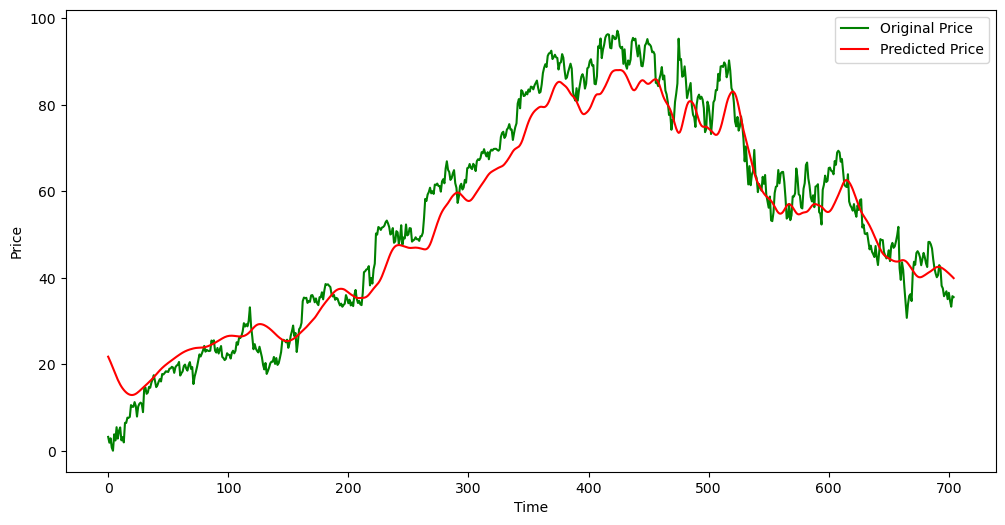

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'g', label="Original Price")
plt.plot(y_pred, 'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()